In [1]:
import pandas as pd
df = pd.read_csv('..//pandas_practice_codebasics//stocks_data.csv')
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,n.a.
2,MSFT,-1,85,64,bill gates
3,RIL,not available,50,1023,mukesh ambani
4,TATA,5.6,-1,n.a.,ratan tata


In [2]:
# to skip any row indexed by 1
df = pd.read_csv('..//pandas_practice_codebasics//stocks_data.csv',skiprows=[2,3])
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,RIL,not available,50,1023,mukesh ambani
2,TATA,5.6,-1,n.a.,ratan tata


In [3]:
df = pd.read_csv('..//pandas_practice_codebasics//stocks_data.csv', skiprows=1, header=None, names=['tickers','eps','revenue','price','people'])
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,n.a.
2,MSFT,-1,85,64,bill gates
3,RIL,not available,50,1023,mukesh ambani
4,TATA,5.6,-1,n.a.,ratan tata


In [4]:
df = pd.read_csv('..//pandas_practice_codebasics//stocks_data.csv', na_values=['not available','n.a.'])
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845.0,larry page
1,WMT,4.61,484,65.0,NaN
2,MSFT,-1.00,85,64.0,bill gates
3,RIL,NaN,50,1023.0,mukesh ambani
4,TATA,5.60,-1,NaN,ratan tata


In [5]:
df = pd.read_csv('..//pandas_practice_codebasics//stocks_data.csv', na_values={
    'eps':['not available','n.a.'],
    'revenue':['not available','n.a.', -1],
    'price':['not available','n.a.'],
    'people':['not available','n.a.']
})
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87.0,845.0,larry page
1,WMT,4.61,484.0,65.0,NaN
2,MSFT,-1.00,85.0,64.0,bill gates
3,RIL,NaN,50.0,1023.0,mukesh ambani
4,TATA,5.60,NaN,NaN,ratan tata


In [6]:
def define_people(cell):
    if cell=='n.a.':
        return 'sam walton'
    return cell


df = pd.read_csv('..//pandas_practice_codebasics//stocks_data.csv', converters= {
    'people': define_people
})
df

,tickers,eps,revenue,price,people
0,GOOGL,27.82,87,845,larry page
1,WMT,4.61,484,65,sam walton
2,MSFT,-1,85,64,bill gates
3,RIL,not available,50,1023,mukesh ambani
4,TATA,5.6,-1,n.a.,ratan tata


In [7]:
df.to_csv('new_stocks.csv',index=False,header=False)

# Handling Missing Data

In [8]:
df = pd.read_csv('..//pandas_practice_codebasics//weather_data.csv')
df

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,NaN,9.0,Sunny
2,1/5/2017,28.0,NaN,Snow
3,1/6/2017,NaN,7.0,NaN
4,1/7/2017,32.0,NaN,Rain
5,1/8/2017,NaN,NaN,Sunny
6,1/9/2017,NaN,NaN,NaN
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [9]:
df.fillna(0)

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,0.0,9.0,Sunny
2,1/5/2017,28.0,0.0,Snow
3,1/6/2017,0.0,7.0,0
4,1/7/2017,32.0,0.0,Rain
5,1/8/2017,0.0,0.0,Sunny
6,1/9/2017,0.0,0.0,0
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [10]:
df.fillna({
    'temperature':0,
    'windspeed':0,
    'event':'No event'
})

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,0.0,9.0,Sunny
2,1/5/2017,28.0,0.0,Snow
3,1/6/2017,0.0,7.0,No event
4,1/7/2017,32.0,0.0,Rain
5,1/8/2017,0.0,0.0,Sunny
6,1/9/2017,0.0,0.0,No event
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [11]:
df.fillna(method='ffill')

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,32.0,9.0,Sunny
2,1/5/2017,28.0,9.0,Snow
3,1/6/2017,28.0,7.0,Snow
4,1/7/2017,32.0,7.0,Rain
5,1/8/2017,32.0,7.0,Sunny
6,1/9/2017,32.0,7.0,Sunny
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [12]:
print(df)
df.fillna(method='bfill', limit=1)

         day  temperature  windspeed   event
0   1/1/2017         32.0        6.0    Rain
1   1/4/2017          NaN        9.0   Sunny
2   1/5/2017         28.0        NaN    Snow
3   1/6/2017          NaN        7.0     NaN
4   1/7/2017         32.0        NaN    Rain
5   1/8/2017          NaN        NaN   Sunny
6   1/9/2017          NaN        NaN     NaN
7  1/10/2017         34.0        8.0  Cloudy
8  1/11/2017         40.0       12.0   Sunny


,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,28.0,9.0,Sunny
2,1/5/2017,28.0,7.0,Snow
3,1/6/2017,32.0,7.0,Rain
4,1/7/2017,32.0,NaN,Rain
5,1/8/2017,NaN,NaN,Sunny
6,1/9/2017,34.0,8.0,Cloudy
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [13]:
df.dropna()

,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [14]:
print(df)
df.dropna(how='all')

         day  temperature  windspeed   event
0   1/1/2017         32.0        6.0    Rain
1   1/4/2017          NaN        9.0   Sunny
2   1/5/2017         28.0        NaN    Snow
3   1/6/2017          NaN        7.0     NaN
4   1/7/2017         32.0        NaN    Rain
5   1/8/2017          NaN        NaN   Sunny
6   1/9/2017          NaN        NaN     NaN
7  1/10/2017         34.0        8.0  Cloudy
8  1/11/2017         40.0       12.0   Sunny


,day,temperature,windspeed,event
0,1/1/2017,32.0,6.0,Rain
1,1/4/2017,NaN,9.0,Sunny
2,1/5/2017,28.0,NaN,Snow
3,1/6/2017,NaN,7.0,NaN
4,1/7/2017,32.0,NaN,Rain
5,1/8/2017,NaN,NaN,Sunny
6,1/9/2017,NaN,NaN,NaN
7,1/10/2017,34.0,8.0,Cloudy
8,1/11/2017,40.0,12.0,Sunny


In [15]:
df = pd.read_csv('..//pandas_practice_codebasics//weather_data.csv',parse_dates=['day'])
df.set_index('day',inplace=True)
print(df)
df.dropna(thresh=1) # value should be present in atleast 1 column 

            temperature  windspeed   event
day                                       
2017-01-01         32.0        6.0    Rain
2017-01-04          NaN        9.0   Sunny
2017-01-05         28.0        NaN    Snow
2017-01-06          NaN        7.0     NaN
2017-01-07         32.0        NaN    Rain
2017-01-08          NaN        NaN   Sunny
2017-01-09          NaN        NaN     NaN
2017-01-10         34.0        8.0  Cloudy
2017-01-11         40.0       12.0   Sunny


,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [16]:
print(df)
df.interpolate()

            temperature  windspeed   event
day                                       
2017-01-01         32.0        6.0    Rain
2017-01-04          NaN        9.0   Sunny
2017-01-05         28.0        NaN    Snow
2017-01-06          NaN        7.0     NaN
2017-01-07         32.0        NaN    Rain
2017-01-08          NaN        NaN   Sunny
2017-01-09          NaN        NaN     NaN
2017-01-10         34.0        8.0  Cloudy
2017-01-11         40.0       12.0   Sunny


,temperature,windspeed,event
day,,,
2017-01-01,32.000000,6.00,Rain
2017-01-04,30.000000,9.00,Sunny
2017-01-05,28.000000,8.00,Snow
2017-01-06,30.000000,7.00,NaN
2017-01-07,32.000000,7.25,Rain
2017-01-08,32.666667,7.50,Sunny
2017-01-09,33.333333,7.75,NaN
2017-01-10,34.000000,8.00,Cloudy
2017-01-11,40.000000,12.00,Sunny


In [17]:
df = pd.read_csv('..//pandas_practice_codebasics//weather_data.csv',parse_dates=['day'])
df.set_index('day',inplace=True)
df.interpolate(method='time')

,temperature,windspeed,event
day,,,
2017-01-01,32.000000,6.00,Rain
2017-01-04,29.000000,9.00,Sunny
2017-01-05,28.000000,8.00,Snow
2017-01-06,30.000000,7.00,NaN
2017-01-07,32.000000,7.25,Rain
2017-01-08,32.666667,7.50,Sunny
2017-01-09,33.333333,7.75,NaN
2017-01-10,34.000000,8.00,Cloudy
2017-01-11,40.000000,12.00,Sunny


In [18]:
dt = pd.date_range("01-01-2017","01-11-2017") # pd.date_range("Date1","Date2") returns a series of dates as DateTimeIndex object
print(type(dt))
df.reindex(dt)

<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


,temperature,windspeed,event
2017-01-01,32.0,6.0,Rain
2017-01-02,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy


# Replacing values in DataFrame

In [19]:
import numpy as np
df = pd.read_csv('..//pandas_practice_codebasics//weather_data1.csv',parse_dates=['day'])
df.set_index('day',inplace=True)

In [20]:
df.replace(-99999,0)

,temperature,windspeed,event
day,,,
2017-01-01,32,6,Rain
2017-01-02,0,7,Sunny
2017-01-03,28,0,Snow
2017-01-04,0,7,0
2017-01-05,32,0,Rain
2017-01-06,31,2,Sunny
2017-01-06,34,5,0


In [21]:
df.replace([-99999,32],np.NaN)

,temperature,windspeed,event
day,,,
2017-01-01,NaN,6.0,Rain
2017-01-02,NaN,7.0,Sunny
2017-01-03,28.0,NaN,Snow
2017-01-04,NaN,7.0,0
2017-01-05,NaN,NaN,Rain
2017-01-06,31.0,2.0,Sunny
2017-01-06,34.0,5.0,0


In [22]:
df.replace({
    'temperature':-99999,
    'windspeed':-99999,
    'event':'0'
}, np.NaN)

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-02,NaN,7.0,Sunny
2017-01-03,28.0,NaN,Snow
2017-01-04,NaN,7.0,NaN
2017-01-05,32.0,NaN,Rain
2017-01-06,31.0,2.0,Sunny
2017-01-06,34.0,5.0,NaN


In [23]:
df.replace({
    -99999:np.NaN,
    '0':'No Event'
})

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-02,NaN,7.0,Sunny
2017-01-03,28.0,NaN,Snow
2017-01-04,NaN,7.0,No Event
2017-01-05,32.0,NaN,Rain
2017-01-06,31.0,2.0,Sunny
2017-01-06,34.0,5.0,No Event


In [24]:
df = pd.DataFrame({
    'score':['exceptional','average','good','poor','average','exceptional'], 
    'student':['rob','maya','parthiv','tom','julian','erica']
})
df.replace(['poor','average','good','exceptional'],[1,2,3,4])

,score,student
0,4,rob
1,2,maya
2,3,parthiv
3,1,tom
4,2,julian
5,4,erica


# Group by feature in pandas

### `groupby` function for DataFrame is often used with aggregation

In [26]:
df = pd.read_csv('..//pandas_practice_codebasics//weather_by_cities.csv',parse_dates=['day'])
df.set_index('day',inplace=True)
df

,city,temperature,windspeed,event
day,,,,
2017-01-01,new york,32,6,Rain
2017-01-02,new york,36,7,Sunny
2017-01-03,new york,28,12,Snow
2017-01-04,new york,33,7,Sunny
2017-01-01,mumbai,90,5,Sunny
2017-01-02,mumbai,85,12,Fog
2017-01-03,mumbai,87,15,Fog
2017-01-04,mumbai,92,5,Rain
2017-01-01,paris,45,20,Sunny


In [29]:
g = df.groupby('city')
for city, city_df in g:
    print(city)
    print(city_df)

mumbai
              city  temperature  windspeed  event
day                                              
2017-01-01  mumbai           90          5  Sunny
2017-01-02  mumbai           85         12    Fog
2017-01-03  mumbai           87         15    Fog
2017-01-04  mumbai           92          5   Rain
new york
                city  temperature  windspeed  event
day                                                
2017-01-01  new york           32          6   Rain
2017-01-02  new york           36          7  Sunny
2017-01-03  new york           28         12   Snow
2017-01-04  new york           33          7  Sunny
paris
             city  temperature  windspeed   event
day                                              
2017-01-01  paris           45         20   Sunny
2017-01-02  paris           50         13  Cloudy
2017-01-03  paris           54          8  Cloudy
2017-01-04  paris           42         10  Cloudy


In [31]:
g.get_group('mumbai')

,city,temperature,windspeed,event
day,,,,
2017-01-01,mumbai,90,5,Sunny
2017-01-02,mumbai,85,12,Fog
2017-01-03,mumbai,87,15,Fog
2017-01-04,mumbai,92,5,Rain


In [34]:
g.mean()['temperature']

city
mumbai      88.50
new york    32.25
paris       47.75
Name: temperature, dtype: float64

![title](image/split_apply_combine.png)

In [41]:
g.describe()

temperature                                                   \
               count   mean       std   min    25%   50%    75%   max   
city                                                                    
mumbai           4.0  88.50  3.109126  85.0  86.50  88.5  90.50  92.0   
new york         4.0  32.25  3.304038  28.0  31.00  32.5  33.75  36.0   
paris            4.0  47.75  5.315073  42.0  44.25  47.5  51.00  54.0   

         windspeed                                                 
             count   mean       std  min   25%   50%    75%   max  
city                                                               
mumbai         4.0   9.25  5.057997  5.0  5.00   8.5  12.75  15.0  
new york       4.0   8.00  2.708013  6.0  6.75   7.0   8.25  12.0  
paris          4.0  12.75  5.251984  8.0  9.50  11.5  14.75  20.0

In [40]:
g.get_group('mumbai').describe()

,temperature,windspeed
count,4.000000,4.000000
mean,88.500000,9.250000
std,3.109126,5.057997
min,85.000000,5.000000
25%,86.500000,5.000000
50%,88.500000,8.500000
75%,90.500000,12.750000
max,92.000000,15.000000


                city  temperature  windspeed   event
day                                                 
2017-01-01  new york           32          6    Rain
2017-01-02  new york           36          7   Sunny
2017-01-03  new york           28         12    Snow
2017-01-04  new york           33          7   Sunny
2017-01-01    mumbai           90          5   Sunny
2017-01-02    mumbai           85         12     Fog
2017-01-03    mumbai           87         15     Fog
2017-01-04    mumbai           92          5    Rain
2017-01-01     paris           45         20   Sunny
2017-01-02     paris           50         13  Cloudy
2017-01-03     paris           54          8  Cloudy
2017-01-04     paris           42         10  Cloudy


city
mumbai      AxesSubplot(0.125,0.125;0.775x0.755)
new york    AxesSubplot(0.125,0.125;0.775x0.755)
paris       AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

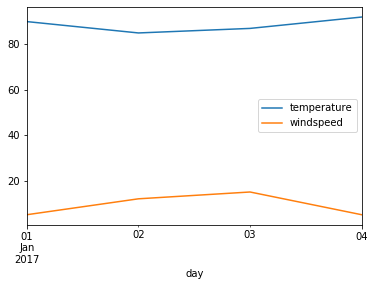

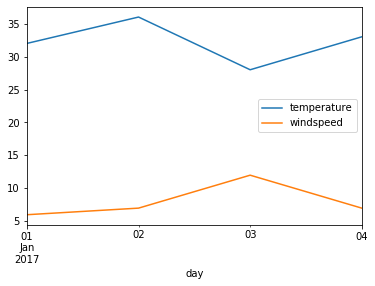

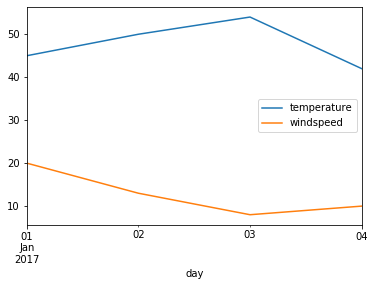

In [44]:
%matplotlib inline
print(df)
import matplotlib.pyplot as plt
g.plot()